# 02 Machine Learning Models for NSCLC

We use `%run ./00_data_preprocessing.ipynb` to import the preprocessed dataset and scaled train-test splits.  
This allows us to focus only on **building and evaluating ML models** without repeating preprocessing steps.


In [21]:
# Runs another notebook and imports all its variables
%run ./00_data_preprocessing.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Columns: 18986 entries, ENSG00000000003 to Labels
dtypes: float64(18209), int64(776), object(1)
memory usage: 31.6+ MB
Labels
1    199
0     19
Name: count, dtype: int64


In [22]:
# Check that the variables are imported correctly
print(X_train.shape, X_test.shape)
print(Y_train.value_counts())

(109, 18985) (109, 18985)
Labels
1    99
0    10
Name: count, dtype: int64


## Linear SVM for NSCLC Classification

We use a **Support Vector Machine (SVM) with a linear kernel** to classify NSCLC samples into Normal and Tumor classes.  

**Steps in this section:**

1. Initialize the Linear SVM model with `probability=True` for later use in ROC curves.  
2. Train the model on `X_train` and `Y_train`.  
3. Make predictions on the test set `X_test`.  
4. Evaluate the model using **accuracy, precision, recall, and F1-score**.  
5. Visualize the **confusion matrix** and save it as `svm_linear.png` in the current working directory (can be moved to `../results/`).


Accuracy: 0.963302752293578
Precision: 0.98
Recall: 0.98
F1-score: 0.98


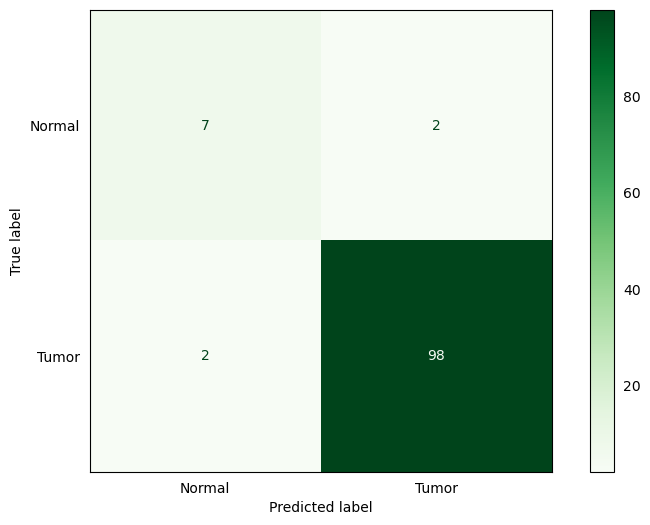

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize Linear SVM
svm_linear = SVC(kernel='linear', probability=True, random_state=40)

# Train the model
svm_linear.fit(X_train, Y_train)

# Predict on test set
prediction = svm_linear.predict(X_test)

# Evaluate performance
Accuracy = accuracy_score(Y_test, prediction)
print('Accuracy:', Accuracy)
print('Precision:', precision_score(Y_test, prediction))
print('Recall:', recall_score(Y_test, prediction))
print('F1-score:', f1_score(Y_test, prediction))

# Confusion matrix plot using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
    svm_linear,
    X_test,
    Y_test,
    cmap=plt.cm.Greens,
    display_labels=['Normal', 'Tumor']
)
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10, 6)

# Save the plot
plt.savefig("../results/svm_linear.png", dpi=600)
plt.show()


## ROC Curve for Linear SVM

The **Receiver Operating Characteristic (ROC) curve** is used to evaluate the classifier's performance:

- X-axis: False Positive Rate (FPR)  
- Y-axis: True Positive Rate (TPR)  
- Area Under the Curve (AUC) quantifies the model's ability to distinguish between classes.  

Here we plot the ROC curve for the **Linear SVM model** and save it as `roc_svm_linear.png` in the `results` folder.


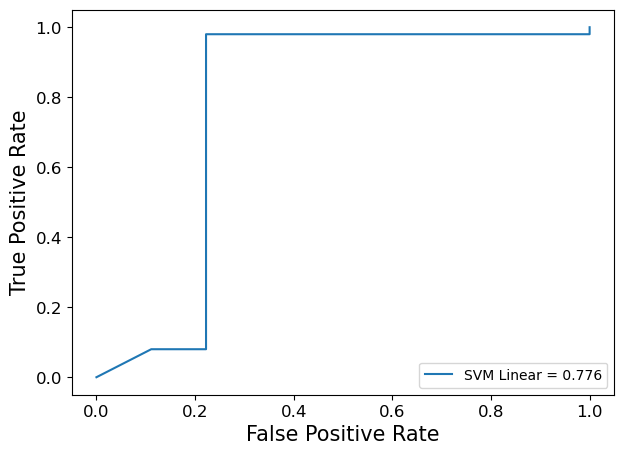

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

# Predict probabilities for the positive class
svm_linear_probs = svm_linear.predict_proba(X_test)[:, 1]

# Compute AUC
svm_linear_auc = roc_auc_score(Y_test, svm_linear_probs)

# Compute ROC curve
svm_linear_fpr, svm_linear_tpr, _ = roc_curve(Y_test, svm_linear_probs)

# Plot ROC curve
fig = plt.figure(figsize=(7, 5))
plt.plot(svm_linear_fpr, svm_linear_tpr, label='SVM Linear = %.3f' % svm_linear_auc)

# Legend and styling
params = {'legend.fontsize': 10, 'legend.handlelength': 2}
plt.rcParams.update(params)
plt.legend()
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save the ROC plot
plt.savefig("../results/roc_svm_linear.png", dpi=600, bbox_inches='tight')
plt.show()


## Polynomial SVM for NSCLC Classification

Here we use a **Support Vector Machine with a polynomial kernel** to classify NSCLC samples.  

**Steps in this section:**

1. Initialize the Polynomial SVM with `probability=True` for ROC curve calculation.  
2. Train the model on `X_train` and `Y_train`.  
3. Make predictions on the test set `X_test`.  
4. Evaluate the model using **accuracy, precision, recall, and F1-score**.  
5. Visualize the **confusion matrix** using `ConfusionMatrixDisplay`.  
6. Plot the **ROC curve** and save both plots in the `results` folder.


Accuracy: 0.963302752293578
Precision: 0.9615384615384616
Recall: 1.0
F1-score: 0.9803921568627451


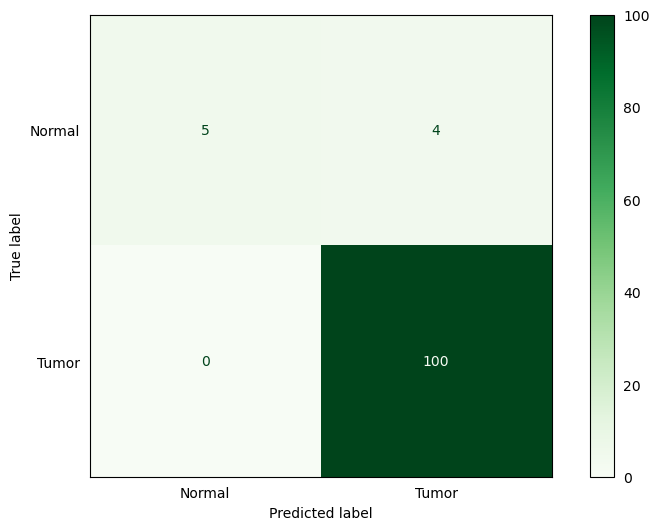

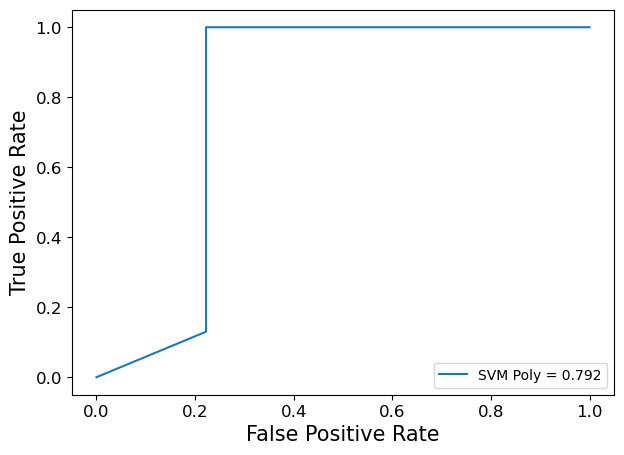

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize Polynomial SVM
svm_poly = SVC(kernel='poly', probability=True, random_state=40)

# Train the model
svm_poly.fit(X_train, Y_train)

# Predict on test set
prediction = svm_poly.predict(X_test)

# Evaluate performance
Accuracy = accuracy_score(Y_test, prediction)
print('Accuracy:', Accuracy)
print('Precision:', precision_score(Y_test, prediction))
print('Recall:', recall_score(Y_test, prediction))
print('F1-score:', f1_score(Y_test, prediction))

# Confusion matrix plot
disp = ConfusionMatrixDisplay.from_estimator(
    svm_poly,
    X_test,
    Y_test,
    cmap=plt.cm.Greens,
    display_labels=['Normal', 'Tumor']
)
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10, 6)

# Save the confusion matrix plot
plt.savefig("../results/svm_poly.png", dpi=600, bbox_inches='tight')
plt.show()

# ROC Curve
svm_poly_probs = svm_poly.predict_proba(X_test)[:, 1]
svm_poly_auc = roc_auc_score(Y_test, svm_poly_probs)
svm_poly_fpr, svm_poly_tpr, _ = roc_curve(Y_test, svm_poly_probs)

# Plot ROC curve
fig = plt.figure(figsize=(7, 5))
plt.plot(svm_poly_fpr, svm_poly_tpr, label='SVM Poly = %.3f' % svm_poly_auc)

# Styling
params = {'legend.fontsize': 10, 'legend.handlelength': 2}
plt.rcParams.update(params)
plt.legend()
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save the ROC plot
plt.savefig("../results/roc_svm_poly.png", dpi=600, bbox_inches='tight')
plt.show()


## RBF SVM for NSCLC Classification

Here we use a **Support Vector Machine with an RBF (Radial Basis Function) kernel** to classify NSCLC samples.  

**Steps in this section:**

1. Initialize the RBF SVM with `probability=True` for ROC curve calculation.  
2. Train the model on `X_train` and `Y_train`.  
3. Make predictions on the test set `X_test`.  
4. Evaluate the model using **accuracy, precision, recall, and F1-score**.  
5. Visualize the **confusion matrix** using `ConfusionMatrixDisplay`.  
6. Plot the **ROC curve** and save both plots in the `results` folder.


Accuracy: 0.963302752293578
Precision: 0.9615384615384616
Recall: 1.0
F1-score: 0.9803921568627451


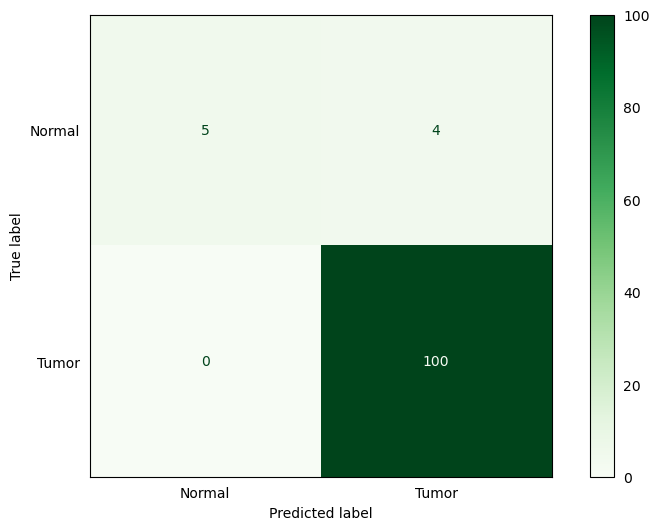

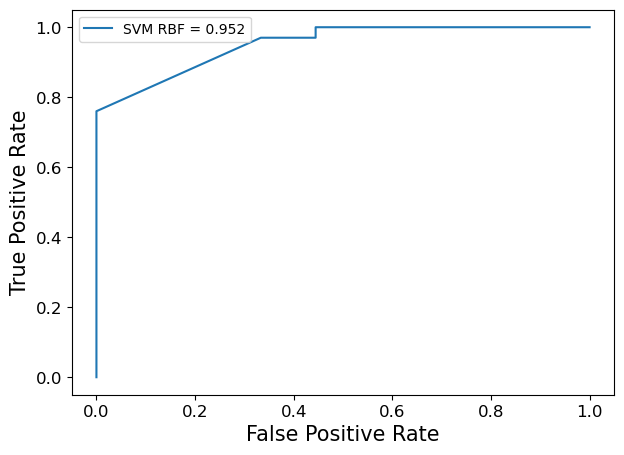

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize RBF SVM
svm_rbf = SVC(kernel='rbf', probability=True, random_state=40)

# Train the model
svm_rbf.fit(X_train, Y_train)

# Predict on test set
prediction = svm_rbf.predict(X_test)

# Evaluate performance
Accuracy = accuracy_score(Y_test, prediction)
print('Accuracy:', Accuracy)
print('Precision:', precision_score(Y_test, prediction))
print('Recall:', recall_score(Y_test, prediction))
print('F1-score:', f1_score(Y_test, prediction))

# Confusion matrix plot
disp = ConfusionMatrixDisplay.from_estimator(
    svm_rbf,
    X_test,
    Y_test,
    cmap=plt.cm.Greens,
    display_labels=['Normal', 'Tumor']
)
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10, 6)

# Save the confusion matrix plot
plt.savefig("../results/svm_rbf.png", dpi=600, bbox_inches='tight')
plt.show()

# ROC Curve
svm_rbf_probs = svm_rbf.predict_proba(X_test)[:, 1]
svm_rbf_auc = roc_auc_score(Y_test, svm_rbf_probs)
svm_rbf_fpr, svm_rbf_tpr, _ = roc_curve(Y_test, svm_rbf_probs)

# Plot ROC curve
fig = plt.figure(figsize=(7, 5))
plt.plot(svm_rbf_fpr, svm_rbf_tpr, label='SVM RBF = %.3f' % svm_rbf_auc)

# Styling
params = {'legend.fontsize': 10, 'legend.handlelength': 2}
plt.rcParams.update(params)
plt.legend()
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save the ROC plot
plt.savefig("../results/roc_svm_rbf.png", dpi=600, bbox_inches='tight')
plt.show()


## Logistic Regression for NSCLC Classification

We use **Logistic Regression (LR)** as a baseline model to classify NSCLC samples.  

**Steps in this section:**

1. Initialize the Logistic Regression model.  
2. Train the model on `X_train` and `Y_train`.  
3. Make predictions on the test set `X_test`.  
4. Evaluate the model using **accuracy, precision, recall, and F1-score**.  
5. Visualize the **confusion matrix** using `ConfusionMatrixDisplay`.  
6. Plot the **ROC curve** and save both plots in the `results` folder.


Accuracy: 0.926605504587156
Precision: 0.9791666666666666
Recall: 0.94
F1-score: 0.9591836734693877


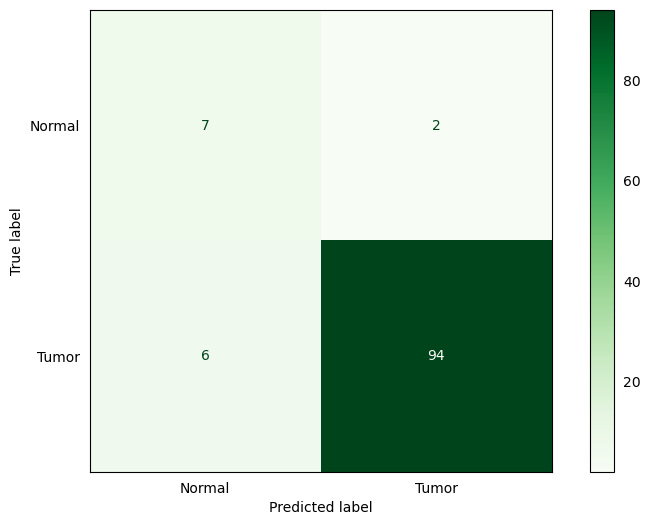

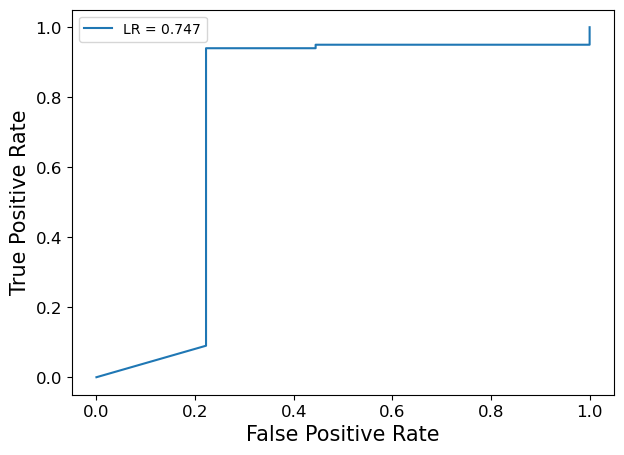

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize Logistic Regression
LR = LogisticRegression(max_iter=1000)  # ensure convergence

# Train the model
LR.fit(X_train, Y_train)

# Predict on test set
prediction = LR.predict(X_test)

# Evaluate performance
Accuracy = accuracy_score(Y_test, prediction)
print('Accuracy:', Accuracy)
print('Precision:', precision_score(Y_test, prediction))
print('Recall:', recall_score(Y_test, prediction))
print('F1-score:', f1_score(Y_test, prediction))

# Confusion matrix plot
disp = ConfusionMatrixDisplay.from_estimator(
    LR,
    X_test,
    Y_test,
    cmap=plt.cm.Greens,
    display_labels=['Normal', 'Tumor']
)
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10, 6)

# Save the confusion matrix plot
plt.savefig("../results/LR.png", dpi=600, bbox_inches='tight')
plt.show()

# ROC Curve
LR_probs = LR.predict_proba(X_test)[:, 1]
LR_auc = roc_auc_score(Y_test, LR_probs)
LR_fpr, LR_tpr, _ = roc_curve(Y_test, LR_probs)

# Plot ROC curve
fig = plt.figure(figsize=(7, 5))
plt.plot(LR_fpr, LR_tpr, label='LR = %.3f' % LR_auc)

# Styling
params = {'legend.fontsize': 10, 'legend.handlelength': 2}
plt.rcParams.update(params)
plt.legend()
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save the ROC plot
plt.savefig("../results/roc_LR.png", dpi=600, bbox_inches='tight')
plt.show()


## Gaussian Naive Bayes for NSCLC Classification

Here we use a **Gaussian Naive Bayes (GNB)** classifier for NSCLC binary classification.  

**Steps in this section:**

1. Initialize the GaussianNB model.  
2. Train the model on `X_train` and `Y_train`.  
3. Make predictions on the test set `X_test`.  
4. Evaluate the model using **accuracy, precision, recall, and F1-score**.  
5. Visualize the **confusion matrix** using `ConfusionMatrixDisplay`.  
6. Plot the **ROC curve** and save both plots in the `results` folder.


Accuracy: 0.8990825688073395
Precision: 0.9238095238095239
Recall: 0.97
F1-score: 0.9463414634146341


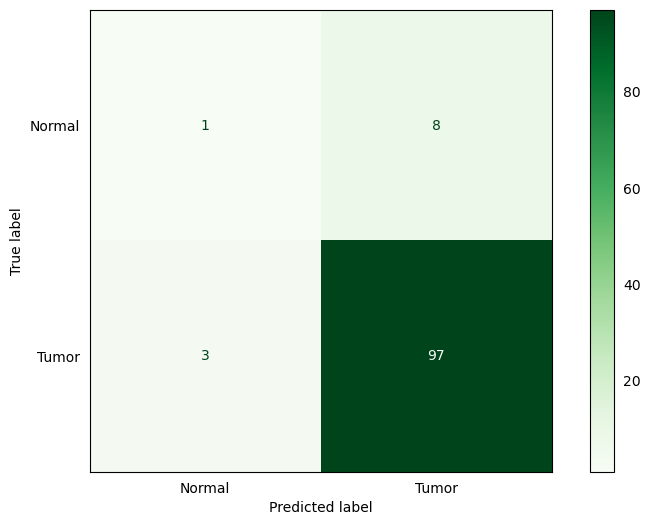

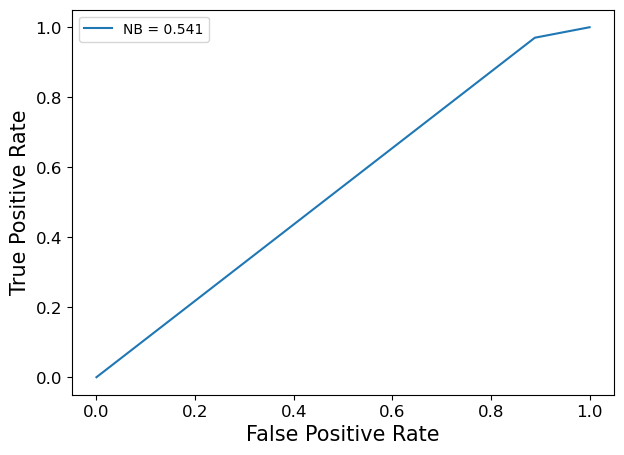

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize Gaussian Naive Bayes
NB = GaussianNB()

# Train the model
NB.fit(X_train, Y_train)

# Predict on test set
prediction = NB.predict(X_test)

# Evaluate performance
Accuracy = accuracy_score(Y_test, prediction)
print('Accuracy:', Accuracy)
print('Precision:', precision_score(Y_test, prediction))
print('Recall:', recall_score(Y_test, prediction))
print('F1-score:', f1_score(Y_test, prediction))

# Confusion matrix plot
disp = ConfusionMatrixDisplay.from_estimator(
    NB,
    X_test,
    Y_test,
    cmap=plt.cm.Greens,
    display_labels=['Normal', 'Tumor']
)
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10, 6)

# Save the confusion matrix plot
plt.savefig("../results/GNB.png", dpi=600, bbox_inches='tight')
plt.show()

# ROC Curve
NB_probs = NB.predict_proba(X_test)[:, 1]
NB_auc = roc_auc_score(Y_test, NB_probs)
NB_fpr, NB_tpr, _ = roc_curve(Y_test, NB_probs)

# Plot ROC curve
fig = plt.figure(figsize=(7, 5))
plt.plot(NB_fpr, NB_tpr, label='NB = %.3f' % NB_auc)

# Styling
params = {'legend.fontsize': 10, 'legend.handlelength': 2}
plt.rcParams.update(params)
plt.legend()
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save the ROC plot
plt.savefig("../results/roc_NB.png", dpi=600, bbox_inches='tight')
plt.show()


## Combined ROC Curves for All Models

Here we compare the performance of all trained models using **ROC curves**.  

**Models included:**
- Logistic Regression (LR)  
- Gaussian Naive Bayes (NB)  
- Support Vector Machine (SVM) with Linear, Polynomial, and RBF kernels  

**Steps in this section:**

1. Extract predicted probabilities for the positive class from all models.  
2. Calculate the **AUROC score** for each model.  
3. Compute the **ROC curves** (FPR and TPR) for each model.  
4. Plot all ROC curves on the same figure for comparison.  
5. Save the plot in the `results` folder.


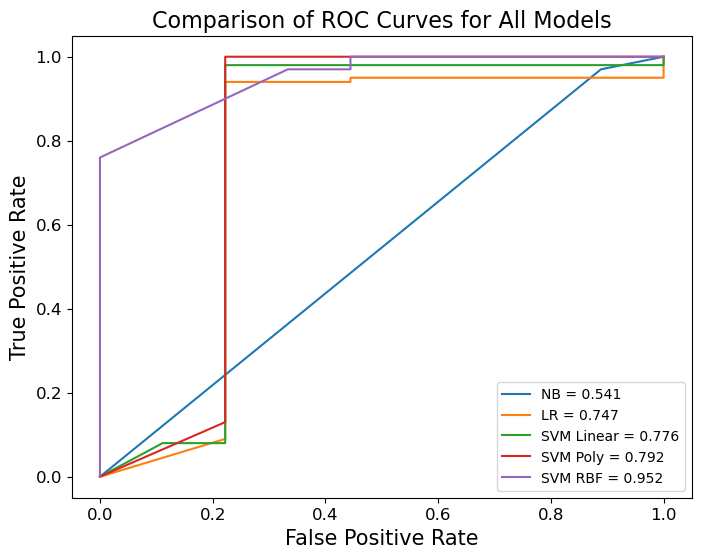

In [29]:
# Keep probabilities for the positive outcome only
LR_probs = LR.predict_proba(X_test)[:, 1]
NB_probs = NB.predict_proba(X_test)[:, 1]
svm_linear_probs = svm_linear.predict_proba(X_test)[:, 1]
svm_poly_probs = svm_poly.predict_proba(X_test)[:, 1]
svm_rbf_probs = svm_rbf.predict_proba(X_test)[:, 1]

# Calculate AUROC scores
LR_auc = roc_auc_score(Y_test, LR_probs)
NB_auc = roc_auc_score(Y_test, NB_probs)
svm_linear_auc = roc_auc_score(Y_test, svm_linear_probs)
svm_poly_auc = roc_auc_score(Y_test, svm_poly_probs)
svm_rbf_auc = roc_auc_score(Y_test, svm_rbf_probs)

# Calculate ROC curves
LR_fpr, LR_tpr, _ = roc_curve(Y_test, LR_probs)
NB_fpr, NB_tpr, _ = roc_curve(Y_test, NB_probs)
svm_linear_fpr, svm_linear_tpr, _ = roc_curve(Y_test, svm_linear_probs)
svm_poly_fpr, svm_poly_tpr, _ = roc_curve(Y_test, svm_poly_probs)
svm_rbf_fpr, svm_rbf_tpr, _ = roc_curve(Y_test, svm_rbf_probs)

# Plot combined ROC curves
fig = plt.figure(figsize=(8, 6))
plt.plot(NB_fpr, NB_tpr, label='NB = %.3f' % NB_auc)
plt.plot(LR_fpr, LR_tpr, label='LR = %.3f' % LR_auc)
plt.plot(svm_linear_fpr, svm_linear_tpr, label='SVM Linear = %.3f' % svm_linear_auc)
plt.plot(svm_poly_fpr, svm_poly_tpr, label='SVM Poly = %.3f' % svm_poly_auc)
plt.plot(svm_rbf_fpr, svm_rbf_tpr, label='SVM RBF = %.3f' % svm_rbf_auc)

# Styling
params = {'legend.fontsize': 10, 'legend.handlelength': 2}
plt.rcParams.update(params)
plt.legend()
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Comparison of ROC Curves for All Models", fontsize=16)

# Save combined ROC plot
plt.savefig("../results/combined_AUC_ROC.png", dpi=600, bbox_inches='tight')
plt.show()


## Combined Precision-Recall Curves for All Models

Here we compare the performance of all trained models using **Precision-Recall (PR) curves**.  

**Models included:**
- Logistic Regression (LR)  
- Gaussian Naive Bayes (NB)  
- Support Vector Machine (SVM) with Linear, Polynomial, and RBF kernels  

**Steps in this section:**

1. Calculate precision and recall values using `precision_recall_curve` for each model.  
2. Compute **area under the PR curve (PR-AUC)** for each model.  
3. Plot all PR curves on the same figure for comparison.  
4. Save the plot in the `results` folder.


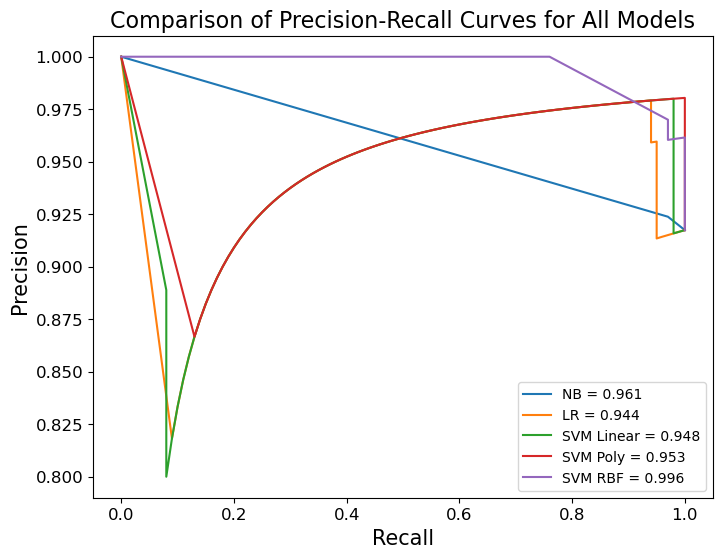

In [30]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Calculate precision and recall for each model
LR_precision, LR_recall, _ = precision_recall_curve(Y_test, LR_probs)
NB_precision, NB_recall, _ = precision_recall_curve(Y_test, NB_probs)
svm_linear_precision, svm_linear_recall, _ = precision_recall_curve(Y_test, svm_linear_probs)
svm_poly_precision, svm_poly_recall, _ = precision_recall_curve(Y_test, svm_poly_probs)
svm_rbf_precision, svm_rbf_recall, _ = precision_recall_curve(Y_test, svm_rbf_probs)

# Calculate area under the PR curve (PR-AUC)
LR_auc = auc(LR_recall, LR_precision)
NB_auc = auc(NB_recall, NB_precision)
svm_linear_auc = auc(svm_linear_recall, svm_linear_precision)
svm_poly_auc = auc(svm_poly_recall, svm_poly_precision)
svm_rbf_auc = auc(svm_rbf_recall, svm_rbf_precision)

# Plot combined PR curves
fig = plt.figure(figsize=(8, 6))
plt.plot(NB_recall, NB_precision, label='NB = %.3f' % NB_auc)
plt.plot(LR_recall, LR_precision, label='LR = %.3f' % LR_auc)
plt.plot(svm_linear_recall, svm_linear_precision, label='SVM Linear = %.3f' % svm_linear_auc)
plt.plot(svm_poly_recall, svm_poly_precision, label='SVM Poly = %.3f' % svm_poly_auc)
plt.plot(svm_rbf_recall, svm_rbf_precision, label='SVM RBF = %.3f' % svm_rbf_auc)

# Styling
params = {'legend.fontsize': 10, 'legend.handlelength': 2}
plt.rcParams.update(params)
plt.legend()
plt.ylabel('Precision', fontsize=15)
plt.xlabel('Recall', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Comparison of Precision-Recall Curves for All Models", fontsize=16)

# Save combined PR plot
plt.savefig("../results/combined_PR_curve.png", dpi=600, bbox_inches='tight')
plt.show()


## Artificial Neural Network (ANN) for Binary Classification of NSCLC

In this section, we build a simple **Artificial Neural Network (ANN)** to predict NSCLC from gene expression data.  

**Steps:**
1. Construct a feed-forward ANN with one hidden layer.  
2. Compile the model using **binary crossentropy** loss and **Adam** optimizer.  
3. Train the model on the training data.  
4. Evaluate the model using accuracy, precision, recall, and F1 score.  
5. Visualize the **confusion matrix**.  
6. Plot the **ROC curve** to assess classification performance.


UserWarning: Do not pass an input_shape/input_dim argument to a layer. When using Sequential models, prefer using an Input(shape) object as the first layer in the model instead.


In [33]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

c:\Users\maira\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
from tensorflow.keras.layers import Input
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.8736 - loss: 0.6152 - val_accuracy: 0.8182 - val_loss: 1.1943
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.0095 - val_accuracy: 0.8636 - val_loss: 1.5699
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9885 - loss: 0.0154 - val_accuracy: 0.8636 - val_loss: 1.5634
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 1.0000 - loss: 1.1386e-04 - val_accuracy: 0.9091 - val_loss: 1.4295
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 1.0000 - loss: 1.0964e-04 - val_accuracy: 0.9091 - val_loss: 1.3478
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 1.0000 - loss: 9.4704e-05 - val_accuracy: 0.9091 - val_loss: 1.2868
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 1.0000 - loss: 6.5756e-05 - val_accuracy: 0.9091 - val_loss: 1.2377
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 1.0000 - loss: 4.9296e-05 - val_accuracy: 0.909

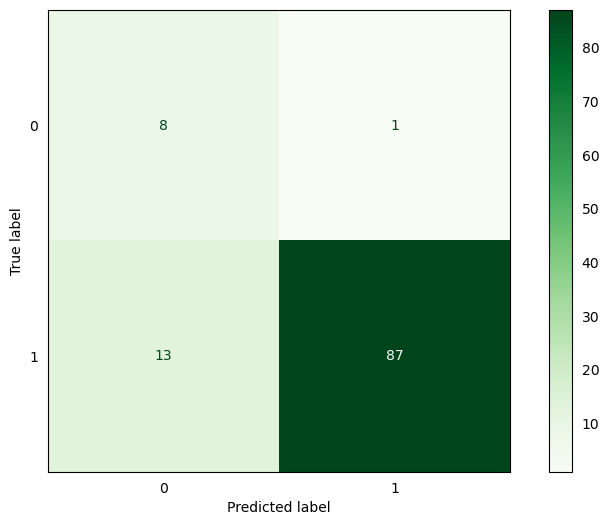

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


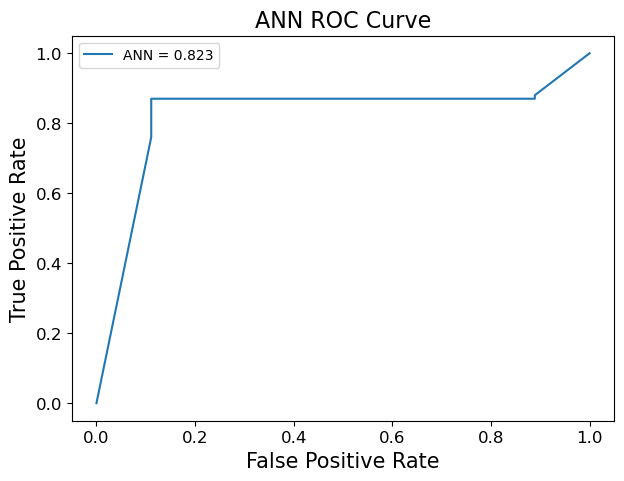

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions
predictions = (model.predict(X_test) > 0.5).astype(int)

# Evaluate metrics
accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)
f1 = f1_score(Y_test, predictions)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Confusion Matrix
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Greens, values_format='d')
plt.xlabel('Predicted label', color='black')
plt.ylabel('True label', color='black')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10, 6)
plt.savefig("../results/ANN_confusion_matrix.png", dpi=600)
plt.show()

# ROC Curve
ann_probs = model.predict(X_test)
ann_auc = roc_auc_score(Y_test, ann_probs)
ann_fpr, ann_tpr, _ = roc_curve(Y_test, ann_probs)

# Plot ROC curve
fig = plt.figure(figsize=(7, 5))
plt.plot(ann_fpr, ann_tpr, label='ANN = %.3f' % ann_auc)
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("ANN ROC Curve", fontsize=16)
plt.legend()
plt.savefig("../results/ANN_ROC_curve.png", dpi=600, bbox_inches='tight')
plt.show()
